\[SEP592\] 소프트웨어 특강 <데이터사이언스 입문>
# 4주차 실습 파트

> 강의일: 2021.03.25.

👤 실습담당자: 임채균 (KAIST 전산학부) &nbsp;&nbsp; | &nbsp;&nbsp; 📧 Email: rayote@kaist.ac.kr

---
<br />

#### &nbsp;&nbsp; *실습 목표*

*   사전학습된 VGG 모델을 Keras에서 사용하는 방법을 확인함.
*   Keras 환경에서 <u>RNN (Recurrent Neural Network)의 구조 및 사용법</u>을 학습함.



<br />

#### &nbsp;&nbsp; *References*

*   김태영, “블록과 함께 하는 파이썬 딥러닝 케라스,” 디지털
북스, 2017.
  * 김태영의 케라스 블로그 <small>https://tykimos.github.io/lecture/</small>

<br />

---

##### *(참고)* 각각의 코드 셀의 실행시간을 자동으로 측정해주는 모듈을 설치함.

In [9]:
# 각 코드 셀의 실행시간 측정 모듈
!pip install ipython-autotime

%load_ext autotime

time: 136 µs (started: 2021-03-27 08:58:02 +00:00)


##### Keras 버전 차이로 실습 시 에러 발생하므로, 구버전으로 재설치

*   재설치 버전 
    - keras 2.3.1
    -   tensorflow 2.2.0 

In [12]:
# 기존 keras 삭제하기
!pip uninstall -y keras
!pip uninstall -y tensorflow

# 구버전 재설치
!pip install keras==2.3.1
!pip install tensorflow==2.2.0

Uninstalling Keras-2.3.1:
  Successfully uninstalled Keras-2.3.1
Uninstalling tensorflow-2.2.0:
  Successfully uninstalled tensorflow-2.2.0
  Using cached https://files.pythonhosted.org/packages/ad/fd/6bfe87920d7f4fd475acd28500a42482b6b84479832bdc0fe9e589a60ceb/Keras-2.3.1-py2.py3-none-any.whl
ERROR: fancyimpute 0.4.3 requires tensorflow, which is not installed.


  Using cached https://files.pythonhosted.org/packages/4c/1a/0d79814736cfecc825ab8094b39648cc9c46af7af1bae839928acb73b4dd/tensorflow-2.2.0-cp37-cp37m-manylinux2010_x86_64.whl


time: 1min 13s (started: 2021-03-27 08:52:10 +00:00)


In [1]:
import keras
print(keras.__version__)

import tensorflow as tf
print(tf.__version__)

Using TensorFlow backend.


2.3.1
2.2.0


## **<small>(지난 실습 cont'd)</small> 5. 사전학습된 VGG 모델 사용**

### **도전 시험셋 데이터 준비**

In [2]:
# Colab 환경에 데이터 받기
!wget https://github.com/tykimos/tykimos.github.io/raw/master/warehouse/2017-3-8-CNN_Data_Augmentation_hard_handwriting_shape.zip

--2021-03-27 08:53:50--  https://github.com/tykimos/tykimos.github.io/raw/master/warehouse/2017-3-8-CNN_Data_Augmentation_hard_handwriting_shape.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tykimos/tykimos.github.io/master/warehouse/2017-3-8-CNN_Data_Augmentation_hard_handwriting_shape.zip [following]
--2021-03-27 08:53:50--  https://raw.githubusercontent.com/tykimos/tykimos.github.io/master/warehouse/2017-3-8-CNN_Data_Augmentation_hard_handwriting_shape.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 335762 (328K) [application/zip]
Saving to: ‘2017-3-8-CNN_Data_Augmentation_hard_hand

In [5]:
# 데이터 경로(warehouse/)에 압축 해제하기
!unzip 2017-3-8-CNN_Data_Augmentation_hard_handwriting_shape.zip -d warehouse

Archive:  2017-3-8-CNN_Data_Augmentation_hard_handwriting_shape.zip
replace warehouse/hard_handwriting_shape/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: warehouse/hard_handwriting_shape/.DS_Store  
  inflating: warehouse/__MACOSX/hard_handwriting_shape/._.DS_Store  
  inflating: warehouse/hard_handwriting_shape/test/.DS_Store  
  inflating: warehouse/__MACOSX/hard_handwriting_shape/test/._.DS_Store  
  inflating: warehouse/hard_handwriting_shape/test/circle/.DS_Store  
  inflating: warehouse/__MACOSX/hard_handwriting_shape/test/circle/._.DS_Store  
  inflating: warehouse/hard_handwriting_shape/test/circle/circle021.png  
  inflating: warehouse/__MACOSX/hard_handwriting_shape/test/circle/._circle021.png  
  inflating: warehouse/hard_handwriting_shape/test/circle/circle022.png  
  inflating: warehouse/__MACOSX/hard_handwriting_shape/test/circle/._circle022.png  
  inflating: warehouse/hard_handwriting_shape/test/circle/circle023.png  
  inflating: warehouse/__MACOSX/h

In [7]:
import numpy as np

In [8]:
from keras.preprocessing.image import ImageDataGenerator

# 랜덤시드 고정시키기
np.random.seed(3)

# 데이터 생성하기
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'warehouse/hard_handwriting_shape/train',
        target_size=(224, 224),   # VGG는 이미지를 224×224 크기 사용
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'warehouse/hard_handwriting_shape/test',
        target_size=(224, 224),   # VGG는 이미지를 224×224 크기 사용
        batch_size=3,
        class_mode='categorical')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


### **VGG-16 모델**

*참조 레퍼런스*

https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/

<br />

**주요 파라미터**

*   `include_top (True)`: 
  - Whether or not to include the output layers for the model. You don’t need these if you are fitting the model on your own problem.
*   `weights ('imagenet')`: 
  - What weights to load. You can specify None to not load pre-trained weights if you are interested in training the model yourself from scratch.
*   `input_tensor (None)`: 
  - A new input layer if you intend to fit the model on new data of a different size.
*   `input_shape (None)`: 
  - The size of images that the model is expected to take if you change the input layer.
*   `pooling (None)`: 
  - The type of pooling to use when you are training a new set of output layers.
*   `classes (1000)`: 
  - The number of classes (e.g. size of output vector) for the model.

In [10]:
from keras.applications.vgg16 import VGG16
model = VGG16()

553467904/553467096 [==============================] - 11s 0us/step
time: 13.6 s (started: 2021-03-27 08:58:12 +00:00)


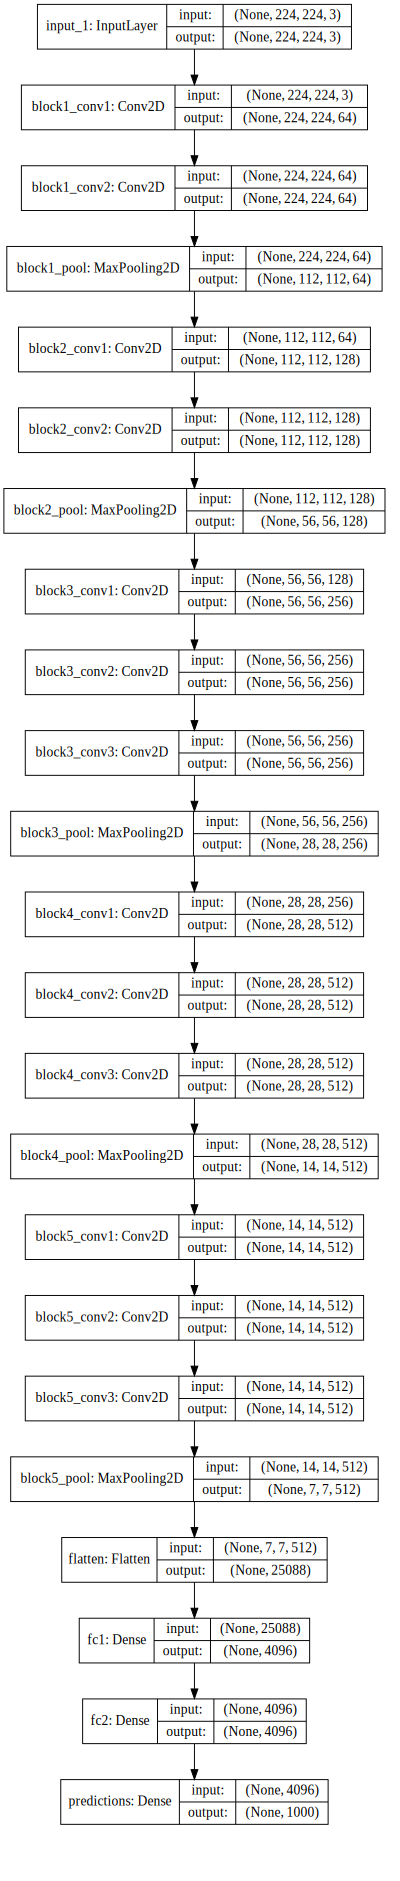

time: 434 ms (started: 2021-03-27 08:59:02 +00:00)


In [11]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

In [12]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

##### *입력 이미지 데이터 준비*

VGG 모델에서는 입력 이미지를 224×224 크기로 사용합니다.

In [13]:
from keras.preprocessing.image import load_img
# load an image from file
path_img = 'warehouse/hard_handwriting_shape/train/triangle/triangle001.png'
image = load_img(path_img, target_size=(224, 224))

time: 28.7 ms (started: 2021-03-27 08:59:41 +00:00)


`Numpy` 배열로 변경하고, 기존 VGG 모델에 맞도록 추가 dimension을 포함하도록 `reshape()` 합니다.

In [14]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)

time: 2.93 ms (started: 2021-03-27 09:00:45 +00:00)


In [15]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

time: 1.26 ms (started: 2021-03-27 09:00:47 +00:00)


Keras에서 제공하는 VGG모델의 입력 전처리 함수 `preprocess_input()`을 적용합니다.

In [16]:
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)

time: 4.96 ms (started: 2021-03-27 09:01:02 +00:00)


In [18]:
image

array([[[[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        ...,

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,


time: 12.8 ms (started: 2021-03-27 09:01:27 +00:00)


##### *모델을 사용하여 예측 실행*

In [17]:
# predict the probability across all output classes
yhat = model.predict(image)

time: 6.07 s (started: 2021-03-27 09:01:08 +00:00)


##### *예측결과 해석*

In [19]:
from keras.applications.vgg16 import decode_predictions
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

40960/35363 [==================================] - 0s 0us/step
airship (6.42%)
time: 145 ms (started: 2021-03-27 09:02:47 +00:00)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


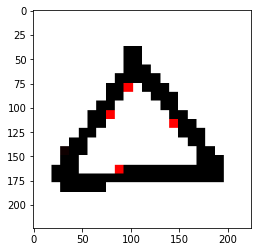

time: 187 ms (started: 2021-03-27 09:04:13 +00:00)


In [20]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.imshow(image.reshape(224, 224, 3))
plt.show()

#### *전체 코드 재정리 (함수화)*

In [21]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

# 입력 전처리 함수
def preproc_image_vgg(path_img):
  # load an image from file
  image = load_img(path_img, target_size=(224, 224))

  # convert the image pixels to a numpy array
  image = img_to_array(image)

  # reshape data for the model
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

  # prepare the image for the VGG model
  image = preprocess_input(image)

  return image

time: 7.18 ms (started: 2021-03-27 09:05:20 +00:00)


In [22]:
from keras.applications.vgg16 import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline

# 결과 해석 및 출력 함수
def print_result_vgg(yhat, image):
  # convert the probabilities to class labels
  label = decode_predictions(yhat)
  # retrieve the most likely result, e.g. highest probability
  label = label[0][0]
  # print the classification
  print('> Predicted Label=  %s (%.2f%%)' % (label[1], label[2]*100))

  # show an image
  plt.imshow(image.reshape(224, 224, 3))
  plt.show()

time: 113 ms (started: 2021-03-27 09:05:28 +00:00)


In [23]:
# VGG를 활용한 전체 예측과정 함수
def predict_vgg(path_img):
  image = preproc_image_vgg(path_img)

  # predict the probability across all output classes
  yhat = model.predict(image)

  print_result_vgg(yhat, image)

time: 2.66 ms (started: 2021-03-27 09:06:20 +00:00)


##### *실행결과 테스트*

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


> Predicted Label=  airship (6.42%)


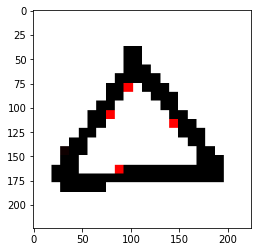

time: 156 ms (started: 2021-03-27 09:06:37 +00:00)


In [24]:
predict_vgg('warehouse/hard_handwriting_shape/train/triangle/triangle001.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


> Predicted Label=  envelope (18.01%)


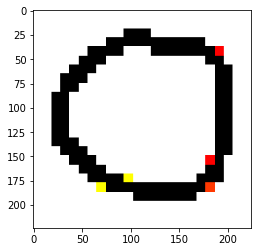

time: 160 ms (started: 2021-03-27 09:06:40 +00:00)


In [25]:
predict_vgg('warehouse/hard_handwriting_shape/train/circle/circle001.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


> Predicted Label=  television (25.52%)


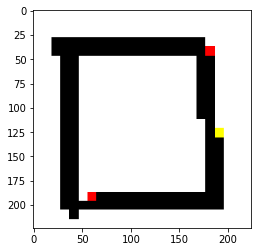

time: 150 ms (started: 2021-03-27 09:06:42 +00:00)


In [26]:
predict_vgg('warehouse/hard_handwriting_shape/train/rectangle/rectangle001.png')

### **VGG-16 모델에 대한 Fine-tuning**

#### *모델 추가 구성하기 (1) - 예측 레이어 추가*

In [27]:
from keras.layers import Dense, GlobalAveragePooling1D
from keras import Model

base_model = VGG16()

# let's add a fully-connected layer
x = base_model.output
x = Dense(256, activation='relu')(x)

# and a logistic layer -- let's say we have 3 classes
predictions = Dense(3, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

time: 1.5 s (started: 2021-03-27 09:07:16 +00:00)


In [28]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [29]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

time: 55.4 ms (started: 2021-03-27 09:07:36 +00:00)


In [30]:
# 모델 학습시키기
model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=10,
        validation_data=test_generator,
        validation_steps=5)

Epoch 1/10
15/15 [==============================] - 1s 48ms/step - loss: 1.0982 - accuracy: 0.4000 - val_loss: 1.1011 - val_accuracy: 0.5333
Epoch 2/10
15/15 [==============================] - 0s 21ms/step - loss: 1.0912 - accuracy: 0.5778 - val_loss: 1.0860 - val_accuracy: 0.3333
Epoch 3/10
15/15 [==============================] - 0s 21ms/step - loss: 1.0840 - accuracy: 0.6222 - val_loss: 1.0798 - val_accuracy: 0.4667
Epoch 4/10
15/15 [==============================] - 0s 21ms/step - loss: 1.0760 - accuracy: 0.6222 - val_loss: 1.0858 - val_accuracy: 0.4667
Epoch 5/10
15/15 [==============================] - 0s 21ms/step - loss: 1.0625 - accuracy: 0.6667 - val_loss: 1.0987 - val_accuracy: 0.4667
Epoch 6/10
15/15 [==============================] - 0s 20ms/step - loss: 1.0546 - accuracy: 0.6444 - val_loss: 1.0654 - val_accuracy: 0.4667
Epoch 7/10
15/15 [==============================] - 0s 21ms/step - loss: 1.0309 - accuracy: 0.6889 - val_loss: 1.0929 - val_accuracy: 0.4667
Epoch 8/10
15

time: 4.03 s (started: 2021-03-27 09:07:42 +00:00)


In [34]:
# 모델 평가하기
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=15)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
accuracy: 46.67%
time: 310 ms (started: 2021-03-27 09:09:01 +00:00)


#### *모델 추가 구성하기 (2) - 사전모델 일부 레이어 활용*

In [35]:
base_model2 = VGG16()

# let's add a fully-connected layer
x = base_model2.output
x = Dense(64, activation='relu')(x)

# and a logistic layer -- let's say we have 3 classes
predictions = Dense(3, activation='softmax')(x)

# this is the model we will train
model2 = Model(inputs=base_model2.input, outputs=predictions)

time: 1.41 s (started: 2021-03-27 09:09:17 +00:00)


In [36]:
# we chose to train the top 2 inception blocks, i.e. we will freeze
# other layers
for layer in base_model2.layers[:-2]:
    layer.trainable = False
for layer in base_model2.layers[-2:]:
    layer.trainable = True

# compile the model (should be done *after* setting layers to non-trainable)
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

time: 40.1 ms (started: 2021-03-27 09:09:25 +00:00)


In [37]:
# 모델 학습시키기
model2.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=10,
        validation_data=test_generator,
        validation_steps=5)

Epoch 1/10
15/15 [==============================] - 1s 38ms/step - loss: 1.1004 - accuracy: 0.2444 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 2/10
15/15 [==============================] - 0s 26ms/step - loss: 1.0992 - accuracy: 0.3333 - val_loss: 1.1031 - val_accuracy: 0.3333
Epoch 3/10
15/15 [==============================] - 0s 27ms/step - loss: 1.0998 - accuracy: 0.3333 - val_loss: 1.1047 - val_accuracy: 0.3333
Epoch 4/10
15/15 [==============================] - 0s 27ms/step - loss: 1.0989 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/10
15/15 [==============================] - 0s 27ms/step - loss: 1.0996 - accuracy: 0.2889 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/10
15/15 [==============================] - 0s 26ms/step - loss: 1.0994 - accuracy: 0.2667 - val_loss: 1.0990 - val_accuracy: 0.3333
Epoch 7/10
15/15 [==============================] - 0s 26ms/step - loss: 1.1003 - accuracy: 0.2444 - val_loss: 1.1021 - val_accuracy: 0.3333
Epoch 8/10
15

time: 4.79 s (started: 2021-03-27 09:09:33 +00:00)


In [38]:
# 모델 평가하기
print("-- Evaluate --")
scores = model2.evaluate_generator(test_generator, steps=15)
print("%s: %.2f%%" %(model2.metrics_names[1], scores[1]*100))

-- Evaluate --
accuracy: 33.33%
time: 310 ms (started: 2021-03-27 09:09:59 +00:00)


---

---

## **1. LSTM 모델의 기본 개념**


순환 신경망 모델은 순차적인 자료에서 규칙적인 패턴을 인식하거나 그 의미를 추론할 수 있습니다. 순차적이라는 특성 때문에 간단한 레이어로도 다양한 형태의 모델을 구성할 수 있습니다. 케라스에서 제공하는 순환 신경망 레이어는 SimpleRNN, GRU, LSTM이 있으나 주로 사용하는 LSTM에 대해서 알아보겠습니다. 

---

### **긴 시퀀스를 기억할 수 있는 LSTM (Long Short-Term Memory units)  레이어**

LSTM 레이어는 아래와 같이 간단히 사용할 수 있습니다.



#### *입력 형태*

    LSTM(3, input_dim=1)

기본 인자는 다음과 같습니다.
* 첫번째 인자 : 메모리 셀의 개수입니다.
* input_dim : 입력 속성 수 입니다.

이는 앞서 살펴본 Dense 레이어 형태와 비슷합니다. 첫번째 인자인 메모리 셀의 개수는 기억용량 정도와 출력 형태를 결정짓습니다. Dense 레이어에서의 출력 뉴런 수와 비슷하다고 보시면 됩니다. input_dim에는 Dense 레이어와 같이 일반적으로 속성의 개수가 들어갑니다. 

    Dense(3, input_dim=1)



LSTM의 한 가지 인자에 대해 더 알아보겠습니다.

    LSTM(3, input_dim=1, input_length=4)

* input_length : 시퀀스 데이터의 입력 길이

Dense와 LSTM을 블록으로 도식화 하면 다음과 같습니다. 왼쪽이 Dense이고, 중앙이 input_length가 1인 LSTM이고 오른쪽이 input_length가 4인 LSTM 입니다. 사실 LSTM의 내부구조는 복잡하지만 간소화하여 외형만 표시한 것입니다. Dense 레이어와 비교한다면 히든 뉴런들이 밖으로 도출되어 있음을 보실 수 있습니다. 그리고 오른쪽 블록인 경우 input_length가 길다고 해서 각 입력마다 다른 가중치를 사용하는 것이 아니라 중앙에 있는 블록을 입력 길이 만큼 연결한 것이기 때문에 모두 동일한 가중치를 공유합니다.

![img](http://tykimos.github.io/warehouse/2017-4-9-RNN_Layer_Talk_LSTM1.png)

#### *출력 형태*

* return_sequences : 시퀀스 출력 여부

LSTM 레이어는 return_sequences 인자에 따라 마지막 시퀀스에서 한 번만 출력할 수 있고 각 시퀀스에서 출력을 할 수 있습니다. many to many 문제를 풀거나 LSTM 레이어를 여러개로 쌓아올릴 때는 return_sequence=True 옵션을 사용합니다. 자세한 것은 뒤에서 살펴보겠습니다. 아래 그림에서 왼쪽은 return_sequences=False일 때, 오른쪽은 return_sequence=True일 때의 형상입니다.

![img](http://tykimos.github.io/warehouse/2017-4-9-RNN_Layer_Talk_LSTM2.png)

#### *상태유지(stateful) 모드*

* stateful : 상태 유지 여부

학습 샘플의 가장 마지막 상태가 다음 샘플 학습 시에 입력으로 전달 여부를 지정하는 것입니다. 하나의 샘플은 4개의 시퀀스 입력이 있고, 총 3개의 샘플이 있을 때, 아래 그림에서 위의 블록들은 stateful=False일 때의 형상이고, 아래 블록들은 stateful=True일 때의 형상입니다. 도출된 현재 상태의 가중치가 다음 샘플 학습 시의 초기 상태로 입력됨을 알 수 있습니다.

![img](http://tykimos.github.io/warehouse/2017-4-9-RNN_Layer_Talk_LSTM3.png)

---

### 요약

순환 신경망 레이어 중 LSTM 레이어에 대해서 알아봤습니다. 사용법은 Dense 레이어와 비슷하지만 시퀀스 출력 여부와 상태유지 모드 설정으로 다양한 형태의 신경망을 구성할 수 있습니다.

## **2. LSTM 모델 시작하기**


본 강좌에서는 간단한 순환 신경망 모델을 만들어봅니다. 늘 그렇듯이 다음과 같은 순서로 진행하겠습니다.

1. 문제 정의하기
1. 데이터셋 준비하기
1. 모델 구성하기
1. 모델 엮기
1. 모델 학습시키기
1. 모델 사용하기

### *모듈 임포트*

In [ ]:
import matplotlib.pyplot

In [ ]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

import theano

%matplotlib inline

### *데이터 생성*

In [ ]:
dataset = np.cos(np.arange(1000)*(20*np.pi/1000))[:,None]

plt.plot(dataset)

dataset.shape

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

### *학습/테스트 데이터 준비 (Window of 20 time steps)*

`look_back`에 지정된 `20`개 만큼의 이전 값을 보고, 그 다음 `1`개를 예측하기 위함.

In [ ]:
look_back = 20
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

`train`에 포함된 데이터 전체 개수는 `670`개

In [ ]:
print(train.shape)

그 중에서, 학습데이터 `trainX`는 길이 `20`개 단위로 구성되어, 총 `650`개

In [ ]:
print(trainX.shape)

`trainY`의 경우에도 쌍을 이루어 구성되므로, 총 `650`개

In [ ]:
print(trainY.shape)

### *간단한 LSTM 모델 학습*


In [ ]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(32,input_dim=1))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(trainX, trainY, nb_epoch=10, batch_size=batch_size, verbose=2)

In [ ]:
trainScore = model.evaluate(trainX, trainY, batch_size=batch_size, verbose=0)
print('Train Score: ', trainScore)
testScore = model.evaluate(testX[:252], testY[:252], batch_size=batch_size, verbose=0)
print('Test Score: ', testScore)

In [ ]:
print(trainX[-1][1:].shape)
print()
print(trainX[-1][1:])

In [ ]:
look_ahead = 250
trainPredict = [np.vstack([trainX[-1][1:], trainY[-1]])]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    predict = model.predict(np.array([trainPredict[-1]]), batch_size=batch_size)
    predictions[i] = predict
    trainPredict.append(np.vstack([trainPredict[-1][1:], predict]))

In [ ]:
plt.figure(figsize=(12,5))
# plt.plot(np.arange(len(trainX)),np.squeeze(trainX))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(trainPredict)[:,None][1:]))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(testY)[:,None][:200]),'r')
plt.plot(np.arange(look_ahead), predictions,'r-.', label="prediction")
plt.plot(np.arange(look_ahead), dataset[train_size:(train_size+look_ahead)], label="test function")
plt.legend()
plt.show()

### *Stateful LSTMs*

In [ ]:
look_back = 20
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [ ]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
# model.add(LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
# model.add(Dropout(0.3))
# model.add(LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
# model.add(Dropout(0.3))
model.add(LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(10):
    print('epochs : %d ' % (i+1) )
    model.fit(trainX, trainY, nb_epoch=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()

In [ ]:
trainScore = model.evaluate(trainX, trainY, batch_size=batch_size, verbose=0)
print('Train Score: ', trainScore)
testScore = model.evaluate(testX[:252], testY[:252], batch_size=batch_size, verbose=0)
print('Test Score: ', testScore)

In [ ]:
look_ahead = 250
trainPredict = [np.vstack([trainX[-1][1:], trainY[-1]])]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([trainPredict[-1]]), batch_size=batch_size)
    predictions[i] = prediction
    trainPredict.append(np.vstack([trainPredict[-1][1:],prediction]))

In [ ]:
plt.figure(figsize=(12,5))
# plt.plot(np.arange(len(trainX)),np.squeeze(trainX))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(trainPredict)[:,None][1:]))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(testY)[:,None][:200]),'r')
plt.plot(np.arange(look_ahead),predictions,'r-.',label="prediction")
plt.plot(np.arange(look_ahead),dataset[train_size:(train_size+look_ahead)],label="test function")
plt.legend()
plt.show()

### *그 외 참고용 소스코드*

#### Stateful LSTMs with wider window

In [ ]:
look_back = 40
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [ ]:
%%time
theano.config.compute_test_value = "ignore"
# create and fit the LSTM network
batch_size = 1
model = Sequential()
# model.add(LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
# model.add(Dropout(0.3))
# model.add(LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
# model.add(Dropout(0.3))
model.add(LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(200):
    model.fit(trainX, trainY, nb_epoch=1, batch_size=batch_size, verbose=0, shuffle=False)
    model.reset_states()

In [ ]:
trainScore = model.evaluate(trainX, trainY, batch_size=batch_size, verbose=0)
print('Train Score: ', trainScore)
testScore = model.evaluate(testX[:252], testY[:252], batch_size=batch_size, verbose=0)
print('Test Score: ', testScore)

In [ ]:
look_ahead = 250
trainPredict = [np.vstack([trainX[-1][1:], trainY[-1]])]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([trainPredict[-1]]), batch_size=batch_size)
    predictions[i] = prediction
    trainPredict.append(np.vstack([trainPredict[-1][1:],prediction]))

In [ ]:
plt.figure(figsize=(12,5))
# plt.plot(np.arange(len(trainX)),np.squeeze(trainX))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(trainPredict)[:,None][1:]))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(testY)[:,None][:200]),'r')
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),dataset[train_size:(train_size+look_ahead)],label="test function")
plt.legend()
plt.show()

#### Stateful LSTMs, Stacked

In [ ]:
%%time
theano.config.compute_test_value = "ignore"
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(200):
    model.fit(trainX, trainY, nb_epoch=1, batch_size=batch_size, verbose=0, shuffle=False)
    model.reset_states()

In [ ]:
trainScore = model.evaluate(trainX, trainY, batch_size=batch_size, verbose=0)
print('Train Score: ', trainScore)
testScore = model.evaluate(testX[:252], testY[:252], batch_size=batch_size, verbose=0)
print('Test Score: ', testScore)

In [ ]:
look_ahead = 250
trainPredict = [np.vstack([trainX[-1][1:], trainY[-1]])]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([trainPredict[-1]]), batch_size=batch_size)
    predictions[i] = prediction
    trainPredict.append(np.vstack([trainPredict[-1][1:],prediction]))

In [ ]:
plt.figure(figsize=(12,5))
# plt.plot(np.arange(len(trainX)),np.squeeze(trainX))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(trainPredict)[:,None][1:]))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(testY)[:,None][:200]),'r')
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),dataset[train_size:(train_size+look_ahead)],label="test function")
plt.legend()
plt.show()

#### Stateful LSTM stacked DEEPER!

In [ ]:
%%time
theano.config.compute_test_value = "ignore"
# create and fit the LSTM network
batch_size = 1
model = Sequential()
for i in range(2):
    model.add(LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
    model.add(Dropout(0.3))
model.add(LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(200):
    model.fit(trainX, trainY, nb_epoch=1, batch_size=batch_size, verbose=0, shuffle=False)
    model.reset_states()

In [ ]:
trainScore = model.evaluate(trainX, trainY, batch_size=batch_size, verbose=0)
print('Train Score: ', trainScore)
testScore = model.evaluate(testX[:252], testY[:252], batch_size=batch_size, verbose=0)
print('Test Score: ', testScore)

In [ ]:
look_ahead = 250
trainPredict = [np.vstack([trainX[-1][1:], trainY[-1]])]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([trainPredict[-1]]), batch_size=batch_size)
    predictions[i] = prediction
    trainPredict.append(np.vstack([trainPredict[-1][1:],prediction]))

In [ ]:
plt.figure(figsize=(12,5))
# plt.plot(np.arange(len(trainX)),np.squeeze(trainX))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(trainPredict)[:,None][1:]))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(testY)[:,None][:200]),'r')
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),dataset[train_size:(train_size+look_ahead)],label="test function")
plt.legend()
plt.show()

#### Normal Deep Learning in Keras

In [ ]:
%%time
trainX = np.squeeze(trainX)
testX = np.squeeze(testX)
theano.config.compute_test_value = "ignore"
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(Dense(output_dim=32,input_dim=40,activation="relu"))
model.add(Dropout(0.3))
for i in range(2):
    model.add(Dense(output_dim=32,activation="relu"))
    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adagrad')
model.fit(trainX, trainY, nb_epoch=100, batch_size=32, verbose=0)

In [ ]:
trainScore = model.evaluate(trainX, trainY, batch_size=batch_size, verbose=0)
print('Train Score: ', trainScore)
testScore = model.evaluate(testX[:252], testY[:252], batch_size=batch_size, verbose=0)
print('Test Score: ', testScore)

In [ ]:
look_ahead = 250
xval = np.hstack([trainX[-1][1:], trainY[-1]])[None,:]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(xval, batch_size=32)
    predictions[i] = prediction
    xval = np.hstack([xval[:,1:],prediction])

In [ ]:
plt.figure(figsize=(12,5))
# plt.plot(np.arange(len(trainX)),np.squeeze(trainX))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(trainPredict)[:,None][1:]))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(testY)[:,None][:200]),'r')
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),dataset[train_size:(train_size+look_ahead)],label="test function")
plt.legend()
plt.show()

1000개의 샘플이 있다.
타임스탬프는 100개이다. 즉 100 순간의 데이터가 있다. 하나의 타임스템프는 10개의 백터 길이가 있다. 
입력자료는 1000 * 100 * 10 
배치사이즈는 20개이다.

배치사이즈를 지정하지 않는다면, 
1000개의 샘플을 모두 취한다.

## **3. LSTM 모델 활용하기**

앞서 살펴본 LSTM 레이어를 이용하여 몇가지 순환 신경망 모델을 만들어보고, 각 모델에 "나비야" 동요를 학습시켜보면서 자세히 살펴보겠습니다.

---

### *시퀀스 데이터 준비*

순환 신경망은 주로 자연어 처리에 많이 쓰이기 때문에 문장 학습 예제가 일반적이지만 본 강좌에서는 악보 학습을 해보겠습니다. 그 이유는 
- 음계가 문장보다 더 코드화 하기 쉽고, 
- 시계열 자료이며, 
- 나온 결과를 악보로 볼 수 있으며,
- 무엇보다 우리가 학습한 모델이 연주하는 곡을 들어볼 수 있기 때문입니다. 
일단 쉬운 악보인 '나비야'를 준비했습니다.

![img](http://tykimos.github.io/warehouse/2017-4-9-RNN_Layer_Talk_2.png)

음표 밑에 간단한 음표코드를 표시하였습니다. 알파벳은 음계를 나타내며, 숫자는 음의 길이를 나타냅니다.
- c(도), d(레), e(미), f(파), g(솔), a(라), b(시)
- 4(4분음표), 8(8분음표)

---

### *데이터셋 생성*

먼저 두 마디만 살펴보겠습니다. 

* g8 e8 e4
* f8 d8 d4 

여기서 우리가 정의한 문제대로 4개 음표 입력으로 다음 출력 음표를 예측하려면, 아래와 같이 데이터셋을 구성합니다.

* g8 e8 e4 f8 **d8** : 1~4번째 음표, **5번째** 음표
* e8 e4 f8 d8 **d4** : 2~5번째 음표, **6번째** 음표

6개의 음표로는 위와 같이 2개의 샘플이 나옵니다. 각 샘플은 4개의 입력 데이터와 1개의 라벨값으로 구성되어 있습니다. 즉 1~4번째 열은 속성(feature)이고, 5번째 열은 클래스(class)를 나타냅니다. 이렇게 4개씩 구간을 보는 것을 윈도우 크기가 4라고 합니다. 그리고 문자와 숫자로 된 음표(코드)로는 모델 입출력으로 사용할 수 없기 때문에 각 코드를 숫자로 변환할 수 있는 사전을 하나 만들어봅니다. 첫번째 사전은 코드를 숫자로, 두번째 사전은 숫자를 코드로 만드는 코드입니다.

In [ ]:
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

이러한 사전을 이용해서 순차적인 음표를 우리가 지정한 윈도우 크기만큼 잘라 데이터셋을 생성하는 함수를 정의해보겠습니다.

In [ ]:
import numpy as np

def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

seq라는 변수에 "나비야" 곡 전체 음표를 저장한 다음, seq2dataset() 함수를 하여 dataset를 생성합니다. 데이터셋은 앞서 정의한 사전에 따라 숫자로 변환되어 생성됩니다.

In [ ]:
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)
print(dataset)

---

### *학습 과정*

"나비야"노래는 우리에게 너무나 익숙한 노래입니다. 만약 옆사람이 "나비야~ 나"까지만 불러도 나머지를 이어서 다 부를 수 있을 정도로 말이죠. 이렇게 첫 4개 음표를 입력하면 나머지를 연주할 수 있는 모델을 만드는 것이 목표입니다. 우리가 정의한 문제를 풀기 위해 먼저 모델을 학습시켜야 합니다. 학습 시키는 방식은 아래와 같습니다.

- 파란색 박스가 입력값이고, 빨간색 박스가 우리가 원하는 출력값입니다. 
- 1~4번째 음표를 데이터로 5번째 음표를 라벨값으로 학습을 시킵니다.
- 다음에는 2~5번째 음표를 데이터로 6번째 음표를 라벨값으로 학습을 시킵니다.
- 이후 한 음표씩 넘어가면서 노래 끝까지 학습시킵니다.

![img](http://tykimos.github.io/warehouse/2017-4-9-RNN_Layer_Talk_5.png)

---
### *예측 과정*

예측은 두 가지 방법으로 해보겠습니다. `한 스텝 예측`과 `곡 전체 예측`입니다. 


#### 한 스텝 예측

한 스텝 예측이란 실제 음표 4개를 입력하여 다음 음표 1개를 예측하는 것을 반복하는 것입니다. 이 방법에서는 모델의 입력값으로는 항상 실제 음표가 들어갑니다.
- 모델에 t0, t1, t2, t3를 입력하면 y0 출력이 나옵니다. 
- 모델에 t1, t2, t3, t4를 입력하면 y1 출력이 나옵니다.
- 모델에 t2, t3, t4, t5를 입력하면 y2 출력이 나옵니다.
- 이 과정을 y49 출력까지 반복합니다. 

![img](http://tykimos.github.io/warehouse/2017-4-9-RNN_Layer_Talk_6.png)

#### 곡 전체 예측

곡 전체 예측이란 입력된 초가 4개 음표만을 입력으로 곡 전체를 예측하는 것입니다. 초반부가 지나면, 예측값만으로 모델에 입력되어 다음 예측값이 나오는 식입니다. 그야말로 "나비야~ 나"까지 알려주면 나머지까지 모두 연주를 하는 것이죠. 만약 중간에 틀린 부분이 생긴다면, 이후 음정, 박자는 모두 이상하게 될 가능성이 많습니다. 예측 오류가 누적되는 것이겠죠.

- 모델에 t0, t1, t2, t3를 입력하면 y0 출력이 나옵니다.
- 예측값인 y0를 t4라고 가정하고, 모델에 t1, t2, t3, t4을 입력하면 y1 출력이 나옵니다.
- 예측값인 y1을 t5라고 가정하고, 모델에 t2, t3, t4(예측값), t5(예측값)을 입력하면 y2 출력이 나옵니다.
- 이 과정을 y49 출력까지 반복합니다.

![img](http://tykimos.github.io/warehouse/2017-4-9-RNN_Layer_Talk_7.png)

---

### *다층 퍼셉트론 모델*

앞서 생성한 데이터셋으로 먼저 다층 퍼셉트론 모델을 학습시켜보겠습니다. Dense 레이어 3개로 구성하였고, 입력 속성이 4개이고 출력이 12개(one_hot_vec_size=12)으로 설정했습니다.

In [ ]:
one_hot_vec_size = len(code2idx)

model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(one_hot_vec_size, activation='softmax'))

"나비야" 악보를 이 모델을 학습할 경우 다음 그림과 같이 수행됩니다. 4개의 음표를 입력으로 받고, 그 다음 음표가 라벨값으로 지정됩니다. 이 과정을 곡이 마칠 때까지 반복하게 됩니다.

![img](http://tykimos.github.io/warehouse/2017-4-9-RNN_Layer_Talk_train_MLP.png)

#### 소스코드

전체 소스는 다음과 같습니다.

In [ ]:
# 0. 사용할 패키지 불러오기
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수        
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

# 1. 데이터 준비하기

# 코드 사전 정의

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

# 시퀀스 데이터 정의

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

# 2. 데이터셋 생성하기
dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)
print(dataset)

# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

# 3. 모델 구성하기
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(one_hot_vec_size, activation='softmax'))

# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = LossHistory() # 손실 이력 객체 생성
history.init()

# 5. 모델 학습시키기
model.fit(x_train, y_train, epochs=2000, batch_size=10, verbose=2, callbacks=[history])
    
# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4)) # batch_size, feature
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

한 스텝 예측 결과와 곡 전체 예측 결과를 악보로 그려보았습니다. 이 중 틀린 부분을 빨간색 박스로 표시해봤습니다. 총 50개 예측 중 4개가 틀려서 92%의 정확도가 나왔습니다. 중간에 틀린 부분이 생기면 곡 전체를 예측하는 데 있어서는 그리 좋은 성능이 나오지 않습니다.

![img](http://tykimos.github.io/warehouse/2017-4-9-RNN_Layer_Talk_MLP_song.png)

위 악보로 연주한 곡은 아래 링크에서 다운로드 받으실 수 있습니다.

* [http://tykimos.github.io/warehouse/2017-4-9-MLP_one_step_prediction.mp3](http://tykimos.github.io/warehouse/2017-4-9-MLP_one_step_prediction.mp3)
* [http://tykimos.github.io/warehouse/2017-4-9-MLP_full_song_prediction.mp3](http://tykimos.github.io/warehouse/2017-4-9-MLP_full_song_prediction.mp3)

---

### *기본 LSTM 모델*

이번에는 간단한 기본 LSTM 모델로 먼저 테스트를 해보겠습니다. 모델 구성은 다음과 같이 하였습니다.
- 128 메모리 셀을 가진 LSTM 레이어 1개와 Dense 레이어로 구성
- 입력은 샘플이 50개, 타임스텝이 4개, 속성이 1개로 구성
- 상태유지(stateful) 모드 비활성화

케라스에서는 아래와 같이 LSTM을 구성할 수 있습니다.

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape = (4, 1)))
model.add(Dense(one_hot_vec_size, activation='softmax'))

LSTM을 제대로 활용하기 위해서는 `상태유지 모드`, `배치사이즈`, `타임스텝`, `속성`에 대한 개념에 이해가 필요합니다. 본 절에서는 `타임스텝`에 대해서 먼저 알아보겠습니다. `타임스텝`이란 하나의 샘플에 포함된 시퀀스 개수입니다. 이는 앞서 살펴본 "input_length"와 동일합니다. 현재 문제에서는 매 샘플마다 4개의 값을 입력하므로 타임스텝이 4개로 지정할 수 있습니다. 즉 윈도우 크기와 동일하게 타임스텝으로 설정하면 됩니다. `속성`에 대해서는 나중에 알아보겠지만, 입력되는 음표 1개당 하나의 인덱스 값을 입력하므로 속성이 1개입니다. 나중에 이 `속성`의 개수를 다르게 해서 테스트 해보겠습니다. 인자로 "input_shape = (4, 1)'과 "input_dim = 1, input_length = 4"는 동일합니다. 설정한 LSTM 모델에 따라 입력할 데이터셋도 샘플 수, 타임스텝 수, 속성 수 형식으로 맞추어야 합니다. 따라서 앞서 구성한 x_train를 아래와 같이 형식을 변환합니다.

In [ ]:
x_train = np.reshape(x_train, (50, 4, 1)) # 샘플 수, 타임스텝 수, 속성 수

이 모델로 악보를 학습할 경우, 다층 퍼셉트론 모델과 동일하게 4개의 음표를 입력으로 받고, 그 다음 음표가 라벨값으로 지정됩니다. 이 과정을 곡이 마칠 때까지 반복하게 됩니다. 다층 퍼셉트론 모델과 차이점이 있다면, 다층 퍼셉트론 모델에서는 4개의 음표가 4개의 속성으로 입력되고, LSTM에서는 4개의 음표가 4개의 시퀀스 입력으로 들어갑니다. 여기서 속성은 1개입니다.

![img](http://tykimos.github.io/warehouse/2017-4-9-RNN_Layer_Talk_train_LSTM.png)

#### 소스코드

전체 소스는 다음과 같습니다.

In [ ]:
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

# 1. 데이터 준비하기
        
# 코드 사전 정의

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

# 시퀀스 데이터 정의

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

# 2. 데이터셋 생성하기

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)

# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 1))

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, input_shape = (4, 1)))
model.add(Dense(one_hot_vec_size, activation='softmax'))

# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = LossHistory() # 손실 이력 객체 생성
history.init()

# 5. 모델 학습시키기
model.fit(x_train, y_train, epochs=2000, batch_size=14, verbose=2, callbacks=[history])

# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

한 스텝 예측 결과와 곡 전체 예측 결과를 악보로 그려보았습니다. 이 중 틀린 부분을 빨간색 박스로 표시해봤습니다. 총 50개 예측 중 4개가 틀려서 92%의 정확도가 나왔습니다. 중간에 틀릭 부분이 생기면 곡 전체를 예측하는 데 있어서는 그리 좋은 성능이 나오지 않습니다.

![img](http://tykimos.github.io/warehouse/2017-4-9-RNN_Layer_Talk_LSTM_song.png)

위 악보로 연주한 곡은 아래 링크에서 다운로드 받으실 수 있습니다.

* [http://tykimos.github.io/warehouse/2017-4-9-Stateless_LSTM_one_step_prediction.mp3](http://tykimos.github.io/warehouse/2017-4-9-Stateless_LSTM_one_step_prediction.mp3)
* [http://tykimos.github.io/warehouse/2017-4-9-Stateless_LSTM_full_song_prediction.mp3](http://tykimos.github.io/warehouse/2017-4-9-Stateless_LSTM_full_song_prediction.mp3)

---

### *상태유지 LSTM 모델*

이번에는 상태유지(Stateful) LSTM 모델에 대해서 알아보겠습니다. 여기서 `상태유지`라는 것은 현재 학습된 상태가 다음 학습 시 초기 상태로 전달된다는 것을 의미합니다. 

    상태유지 모드에서는 현재 샘플의 학습 상태가 다음 샘플의 초기 상태로 전달된다.
    
긴 시퀀드 데이터를 처리할 때, LSTM 모델은 상태유지 모드에서 그 진가를 발휘합니다. 긴 시퀀스 데이터를 샘플 단위로 잘라서 학습하더라도 LSTM 내부적으로 기억할 것은 기억하고 버릴 것은 버려서 기억해야할 중요한 정보만 이어갈 수 있도록 상태가 유지되기 때문입니다. 상태유지 LSTM 모델을 생성하기 위해서는 LSTM 레이어 생성 시, stateful=True로 설정하면 됩니다. 또한 상태유지 모드에서는 입력형태를 batch_input_shape = (배치사이즈, 타임스텝, 속성)으로 설정해야 합니다. 상태유지 모드에서 배치사이즈 개념은 조금 어려우므로 다음 장에서 다루기로 하겠습니다. 

In [ ]:
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 1), stateful=True))
model.add(Dense(one_hot_vec_size, activation='softmax'))

상태유지 모드에서는 모델 학습 시에 `상태 초기화`에 대한 고민이 필요합니다. 현재 샘플 학습 상태가 다음 샘플 학습의 초기상태로 전달되는 식인데, 현재 샘플과 다음 샘플 간의 순차적인 관계가 없을 경우에는 상태가 유지되지 않고 초기화가 되어야 합니다. 다음 상황이 이러한 경우에 해당됩니다.

- 마지막 샘플 학습이 마치고, 새로운 에포크 수행 시에는 새로운 샘플 학습을 해야하므로 상태 초기화 필요
- 한 에포크 안에 여러 시퀀스 데이터 세트가 있을 경우, 새로운 시퀀스 데이터 세트를 학습 전에 상태 초기화 필요

현재 코드에서는 한 곡을 가지고 계속 학습을 시키고 있으므로 새로운 에포크 시작 시에만 상태 초기화를 수행하면 됩니다.

In [ ]:
num_epochs = 2000

for epoch_idx in range(num_epochs):
    print ('epochs : ' + str(epoch_idx) )
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False) # 50 is X.shape[0]
    model.reset_states()

아래 그림은 이 모델로 악보를 학습할 경우를 나타낸 것입니다. 거의 기본 LSTM 모델과 동일하지만 학습된 상태가 다음 샘플 학습 시에 초기 상태로 입력되는 것을 보실 수 있습니다.

![img](http://tykimos.github.io/warehouse/2017-4-9-RNN_Layer_Talk_train_stateful_LSTM.png)

#### 소스코드

전체 소스는 다음과 같습니다.

In [ ]:
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import np_utils

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)        

# 1. 데이터 준비하기

# 코드 사전 정의

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

# 시퀀스 데이터 정의

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

# 2. 데이터셋 생성하기

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)

# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 입력을 (샘플 수, 타임스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 1))

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 1), stateful=True))
model.add(Dense(one_hot_vec_size, activation='softmax'))
    
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기
num_epochs = 2000

history = LossHistory() # 손실 이력 객체 생성

history.init()

for epoch_idx in range(num_epochs):
    print ('epochs : ' + str(epoch_idx) )
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False, callbacks=[history]) # 50 is X.shape[0]
    model.reset_states()
    
# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train, batch_size=1)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
model.reset_states()

# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train, batch_size=1)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장

model.reset_states()
    
print("one step prediction : ", seq_out)

# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

model.reset_states()
    
print("full song prediction : ", seq_out)

한 스텝 예측 결과와 곡 전체 예측 결과를 악보로 그려보았습니다. Stateful LSTM은 음표를 모두 맞추어서, 전체 곡 예측도 정확하게 했습니다.

![img](http://tykimos.github.io/warehouse/2017-4-9-RNN_Layer_Talk_Stateful_LSTM_song.png)

위 악보로 연주한 곡은 아래 링크에서 다운로드 받으실 수 있습니다.

* [http://tykimos.github.io/warehouse/2017-4-9-Stateful_LSTM_f1_one_step_prediction.mp3](http://tykimos.github.io/warehouse/2017-4-9-Stateful_LSTM_f1_one_step_prediction.mp3)
* [http://tykimos.github.io/warehouse/2017-4-9-Stateful_LSTM_f1_full_song_prediction.mp3](http://tykimos.github.io/warehouse/2017-4-9-Stateful_LSTM_f1_full_song_prediction.mp3)

### *입력 속성이 여러 개인 모델 구성*

입력 속성이 여러 개인 경우에 대해서 알아보겠습니다. 예를 들어 '기온'라는 것을 예측하기 위해서 입력으로 '기온'뿐만아니라 '습도', '기압', '풍향', '풍속' 등 다양한 속성이 있을 수 있습니다. 상태유지 LSTM 모델에서 입력형태를 batch_input_shape = (배치사이즈, 타임스텝, 속성)으로 설정하는데, 마지막 인자를 통해 속성의 개수를 지정할 수 있습니다. '나비야' 예제에서는 현재 입력값이 'c4, e4, g8'등으로 되어 있는 데, 이를 음정과 음길이로 나누어서 2개의 속성으로 입력해보겠습니다. 즉 'c4'는 '(c, 4)'로 나누어서 입력하게 되는 것입니다. 이를 위해 데이터셋 만드는 함수를 아래와 같이 수정하였습니다.

In [ ]:
def code2features(code):
    features = []
    features.append(code2scale[code[0]]/float(max_scale_value))
    features.append(code2length[code[1]])
    return features

LSTM 모델 생성 시 batch_input_shape 인자의 마지막 값이 '1'에서 '2'로 수정되었습니다.

In [ ]:
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 2), stateful=True))
model.add(Dense(one_hot_vec_size, activation='softmax'))

아래 그림을 보시면 입력이 두 개로 나누어짐을 보실 수 있습니다. 이 방식은 'c8'이니 'd4'처럼 코드 자체를 학습하는 것이 아니라 음정과 음길이를 나누어서 학습하는 효과를 볼 수 있습니다. 사람이 악보를 읽을 때도 이 둘은 나누어서 인지를 하니 좀 더 사람에 가까운 학습이라고 보실 수 있습니다.

![img](http://tykimos.github.io/warehouse/2017-4-9-RNN_Layer_Talk_train_stateful_LSTM_features.png)



#### 소스코드

전체 소스는 다음과 같습니다.

In [ ]:
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import np_utils

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset_X = []
    dataset_Y = []
    
    for i in range(len(seq)-window_size):
        
        subset = seq[i:(i+window_size+1)]
        
        for si in range(len(subset)-1):
            features = code2features(subset[si])            
            dataset_X.append(features)

        dataset_Y.append([code2idx[subset[window_size]]])
        
    return np.array(dataset_X), np.array(dataset_Y)

# 속성 변환 함수
def code2features(code):
    features = []
    features.append(code2scale[code[0]]/float(max_scale_value))
    features.append(code2length[code[1]])
    return features

# 1. 데이터 준비하기

# 코드 사전 정의

code2scale = {'c':0, 'd':1, 'e':2, 'f':3, 'g':4, 'a':5, 'b':6}
code2length = {'4':0, '8':1}

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

max_scale_value = 6.0
    
# 시퀀스 데이터 정의
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

# 2. 데이터셋 생성하기

x_train, y_train = seq2dataset(seq, window_size = 4)

# 입력을 (샘플 수, 타임스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 2))

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 2), stateful=True))
model.add(Dense(one_hot_vec_size, activation='softmax'))
    
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기
num_epochs = 2000

history = LossHistory() # 손실 이력 객체 생성
history.init()

for epoch_idx in range(num_epochs):
    print ('epochs : ' + str(epoch_idx) )
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False, callbacks=[history]) # 50 is X.shape[0]
    model.reset_states()
    
# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train, batch_size=1)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
model.reset_states()

# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train, batch_size=1)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

model.reset_states()

# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in

seq_in_featrues = []

for si in seq_in:
    features = code2features(si)
    seq_in_featrues.append(features)

for i in range(pred_count):
    sample_in = np.array(seq_in_featrues)
    sample_in = np.reshape(sample_in, (1, 4, 2)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    
    features = code2features(idx2code[idx])
    seq_in_featrues.append(features)
    seq_in_featrues.pop(0)

model.reset_states()
    
print("full song prediction : ", seq_out)

수행결과는 곡 전체를 정확하게 예측을 했습니다.

![img](http://tykimos.github.io/warehouse/2017-4-9-RNN_Layer_Talk_Stateful_LSTM_features_song.png)

위 악보로 연주한 곡은 아래 링크에서 다운로드 받으실 수 있습니다.

* [http://tykimos.github.io/warehouse/2017-4-9-Stateful_LSTM_f2_one_step_prediction.mp3](http://tykimos.github.io/warehouse/2017-4-9-Stateful_LSTM_f2_one_step_prediction.mp3)
* [http://tykimos.github.io/warehouse/2017-4-9-Stateful_LSTM_f2_full_song_prediction.mp3](http://tykimos.github.io/warehouse/2017-4-9-Stateful_LSTM_f2_full_song_prediction.mp3)

---

### 요약

익숙한 노래인 "나비야"를 가지고 순한 신경망 모델에 학습시켜봤습니다. 순항 신경망 모델 중 가장 많이 사용되는 LSTM 모델에 대해서 알아보고, 주요 인자들이 어떤 특성을 가지고 있는 지도 살펴보았습니다. 앞서 살펴본 4가지 모델에 대해서 학습 손실값을 그래프로 표시해봤습니다. 다층퍼셉트론 모델 > 기본 LSTM 모델 > 상태유지 LSTM 모델 (1개 속성) > 상태유지 LSTM 모델 (2개 속성) 순으로 더 빨리 학습되는 것을 확인할 수 있습니다.

![img](http://tykimos.github.io/warehouse/2017-4-9-RNN_Layer_Talk_loss_history.png)

## **Lab 2**

다른 노래를 이용해서, 3장에서와 같은 방식으로 <u>악보를 예측하는 모델</u>을 학습하고, 출력 결과로부터 성능을 확인합니다.

*   순환 신경망 모델의 레이어 또는 파라미터를 자유롭게 조절
*   또는, 사전 데이터를 참조하는 윈도우 범위<small>(e.g., 예제에서 20개 보고 예측)</small> 등을 자유롭게 조절

실습코드의 결과를 초과하여 성능이 향상되는 구성을 만들어보고, 출력 결과를 확인합니다.

**※ 제출방법:** 실습내용 및 출력 결과가 저장된 Colab 파일(`*.ipynb`)를 KLMS의 과제 항목에 업로드

### **<small>(참고)</small> 악보 시각화 툴 설치**

*   Abjad 공식 홈페이지: https://abjad.github.io/
  - Documantation:  http://abjad.mbrsi.org/index.html
*   LilyPond 공식 홈페이지: http://lilypond.org/development.html


#### *Abjad 파이썬 모듈 설치*


In [ ]:
!pip install abjad[development,ipython]

#### *LilyPond 리눅스 라이브러리 설치*


In [ ]:
# 설치 스크립트 다운로드
!wget https://lilypond.org/download/binaries/linux-64/lilypond-2.22.0-1.linux-64.sh

In [ ]:
# 스크립트 실행 후, 출력 콘솔에서 Enter 입력하여 설치 진행
!sh lilypond-2.22.0-1.linux-64.sh

In [ ]:
# 정상 설치여부 확인
!lilypond --version

In [ ]:
# 위 버전 확인 단계에서, 
#   특정 라이브러리가 없다고 하는 경우, 문제해결을 위해 심볼릭 링크 재생성
!rm /usr/local/lilypond/usr/lib/libstdc++.so.6 
!ln -s /usr/lib/x86_64-linux-gnu/libstdc++.so.6 /usr/local/lilypond/usr/lib/libstdc++.so.6 

#### *악보출력 기능 확인*


In [ ]:
%load_ext abjadext.ipython

In [ ]:
import abjad
seq = "c'16 f' g' a' d' g' a' b' e' a' b' c'' f' b' c'' d''16"
voice_1 = abjad.Voice(seq, name="Voice_1")
staff_1 = abjad.Staff([voice_1], name="Staff_1")
abjad.show(staff_1)

### **신규 악보 및 코드 작성영역**


#### *신규 악보: 비행기 (동요)*

In [ ]:
seq_lab2 = "e'8. d'16 c'8 d'8 e'8 e'8 e'4"\
            + " d'8 d'8 d' e'8 e'8 e'"\
            + " e'8. d'16 c'8 d'8 e'8 e'8 e'"\
            + " d'8 d'8 e'8. d'16 c'1"

voice_1 = abjad.Voice(seq_lab2, name="Voice_1")
staff_1 = abjad.Staff([voice_1], name="Staff_1")
abjad.show(staff_1)

#### *코드 작성영역*


In [ ]:
######
## 3장 내용을 참조해서 Lab2를 작성하세요.
######




